# Pandas com dados geoespaciais ou localização geográfica

* Dados com informações geográficas são úteis em várias aplicações de análise de dados
  * todas as regiões da cidade possuem cobertura razoável de serviços públicos?
  * como se distribue a chuva ao longo do estado?
  * a densidade populacional está relacionada com posição geográfica?

* O pandas não está nativamente preparado para lidar com esse tipo de dados
  * GeoPandas é uma expanção do pandas para incorporar dados geoespaciais e localizações geográficas
  * Ao contrário das bibliotecas que usamos até aqui, ele não vem instalado por padrão no Colab

In [2]:
!pip install geopandas

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached Fiona-1.8.21-cp37-cp37m-manylinux2014_x86_64.whl (16.7 MB)
  Using cached pyproj-3.2.1-cp37-cp37m-manylinux2010_x86_64.whl (6.3 MB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)


In [3]:
import geopandas as gpd

## Carregando um arquivo com dados geográficos

* GeoPandas pode ler dados dos arquivos mais comuns para trabalhar com esse tipo de informação
* O IPECE disponibiliza [aqui](http://mapas.ipece.ce.gov.br/i3geo/ogc/index.php) vários conjuntos de dados geográficos referentes ao estado do Ceará

In [4]:
geo_data = gpd.read_file('http://mapas.ipece.ce.gov.br/i3geo/ogc.php?OUTPUTFORMAT=geojson&bbox=-76.512593,-36.948432,-29.585185,7.046013&service=wfs&version=1.1.0&request=getfeature&layers=terras_indigenas&typeName=terras_indigenas')

In [6]:
geo_data.head()

,id,codigo_da_funai,nome_da_terra,etnia,municipio,superficie,fase,modalidade,geometry
0,1,10401,Córrego João Pereira,Tremembé,"Itarema,Acaraú",3162.3901,Regularizada,Tradicionalmente ocupada,"POLYGON ((-39.92714 -3.10869, -39.92733 -3.118..."
1,2,24901,Lagoa Encantada,Kanindé,Aquiraz,1731,Declarada,Tradicionalmente ocupada,"POLYGON ((-38.28501 -3.95769, -38.28477 -3.957..."
2,3,36201,Pitaguary,Pitaguari,"Pacatuba,Maracanaú",1727.8686,Declarada,Tradicionalmente ocupada,"POLYGON ((-38.63470 -3.90361, -38.62494 -3.908..."
3,4,73714,Taba dos Anacé,Anacé,"São Gonçalo do Amarante,Caucaia",543,Encaminhada RI,Reserva Indígena,"POLYGON ((-38.71403 -3.69265, -38.71173 -3.690..."
4,5,54601,Tapeba,Tapeba,Caucaia,5294,Declarada,Tradicionalmente ocupada,"POLYGON ((-38.68825 -3.77950, -38.68825 -3.779..."


* um GeoDataFrame possui uma coluna especial **geometry** que pode ser visualizada

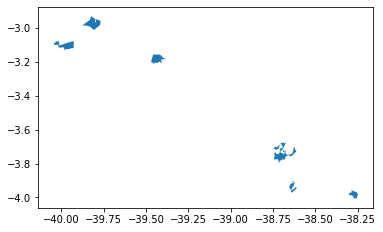

In [7]:
geo_data.plot()

* existem vários tipos de estruturas geométricas, mas os mais comuns são pontos, linhas e polígonos

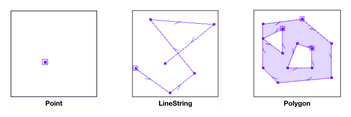

## Funcionalidades do Pandas 

In [13]:
# geo_data = geo_data.set_index('id')
print(geo_data.head(8))

   codigo_da_funai                nome_da_terra      etnia  \
id                                                           
1            10401         Córrego João Pereira   Tremembé   
2            24901             Lagoa  Encantada    Kanindé   
3            36201                    Pitaguary  Pitaguari   
4            73714               Taba dos Anacé      Anacé   
5            54601                       Tapeba     Tapeba   
7            46001         Tremembé de Almofala   Tremembé   
6            70601  Tremembé da Barra do Mundaú   Tremembé   
8            64601        Tremembé de Queimadas   Tremembé   

                          municipio superficie            fase  \
id                                                               
1                    Itarema,Acaraú  3162.3901    Regularizada   
2                           Aquiraz       1731       Declarada   
3                Pacatuba,Maracanaú  1727.8686       Declarada   
4   São Gonçalo do Amarante,Caucaia        543  E

In [11]:
geo_data.shape

(8, 8)

## Exemplo - Estado do Ceará

In [14]:
geo_ce = gpd.read_file('http://mapas.ipece.ce.gov.br/i3geo/ogc.php?OUTPUTFORMAT=geojson&bbox=-76.512593,-36.948432,-29.585185,7.046013&service=wfs&version=1.1.0&request=getfeature&layers=setores_populacao_2010&typeName=setores_populacao_2010')

In [17]:
geo_ce.head()

,id,bairro,distrito,municipio,codigo_do_municipio,zona,codigo_setor_censitario,populacao_total,domicilios_dotal,domicilios_renda_menor_meio_salario,%_de_domicilios_renda_menor_meio_salario,numero_de_domicilios_extremamente_pobre,populacao_extremamente_pobre,%_de_populacao_extremamente_pobre,geometry
0,1,João Paulo II,CANINDÉ,CANINDÉ,2302800,URBANO,230280005000015,865,231,162,70.12987,49,192,22.196532,"POLYGON ((-39.32223 -4.36271, -39.32202 -4.362..."
1,2,Barra do Ceará,FORTALEZA,FORTALEZA,2304400,URBANO,230440005070846,328,106,49,46.226415,7,15,4.573171,"POLYGON ((-38.58367 -3.69383, -38.58367 -3.693..."
2,3,Nossa Senhora das Graças,CANINDÉ,CANINDÉ,2302800,URBANO,230280005000073,798,206,156,75.728155,56,234,29.323308,"POLYGON ((-39.32300 -4.36238, -39.32423 -4.363..."
3,4,,CAPONGA,CASCAVEL,2303501,URBANO,230350110000002,457,130,52,40,7,36,7.877462,"POLYGON ((-38.19371 -4.03993, -38.19373 -4.039..."
4,5,,CAPONGA,CASCAVEL,2303501,URBANO,230350110000003,179,49,23,46.938776,6,33,18.435754,"POLYGON ((-38.18924 -4.04431, -38.18946 -4.044..."


In [18]:
geo_ce = geo_ce.set_index('id')
geo_ce.head()

,bairro,distrito,municipio,codigo_do_municipio,zona,codigo_setor_censitario,populacao_total,domicilios_dotal,domicilios_renda_menor_meio_salario,%_de_domicilios_renda_menor_meio_salario,numero_de_domicilios_extremamente_pobre,populacao_extremamente_pobre,%_de_populacao_extremamente_pobre,geometry
id,,,,,,,,,,,,,,
1,João Paulo II,CANINDÉ,CANINDÉ,2302800,URBANO,230280005000015,865,231,162,70.12987,49,192,22.196532,"POLYGON ((-39.32223 -4.36271, -39.32202 -4.362..."
2,Barra do Ceará,FORTALEZA,FORTALEZA,2304400,URBANO,230440005070846,328,106,49,46.226415,7,15,4.573171,"POLYGON ((-38.58367 -3.69383, -38.58367 -3.693..."
3,Nossa Senhora das Graças,CANINDÉ,CANINDÉ,2302800,URBANO,230280005000073,798,206,156,75.728155,56,234,29.323308,"POLYGON ((-39.32300 -4.36238, -39.32423 -4.363..."
4,,CAPONGA,CASCAVEL,2303501,URBANO,230350110000002,457,130,52,40,7,36,7.877462,"POLYGON ((-38.19371 -4.03993, -38.19373 -4.039..."
5,,CAPONGA,CASCAVEL,2303501,URBANO,230350110000003,179,49,23,46.938776,6,33,18.435754,"POLYGON ((-38.18924 -4.04431, -38.18946 -4.044..."


In [21]:
geo_mun = geo_ce.loc[ geo_ce['municipio']=='FORTALEZA', : ]

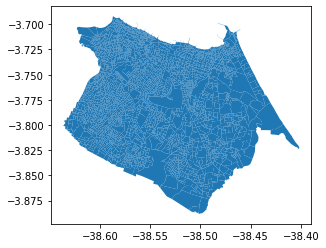

In [22]:
geo_mun.plot()

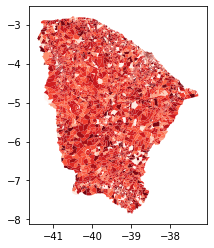

In [26]:
geo_ce.plot(column='populacao_total', cmap='Reds')

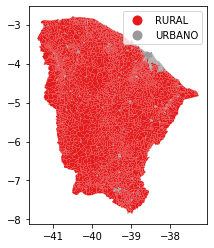

In [29]:
geo_ce.plot(column='zona', legend=True, cmap='Set1')

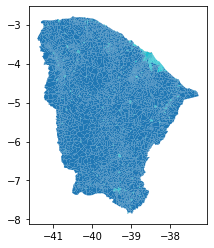

In [30]:
geo_ce.plot(column='zona')